## Problem Statement

Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic dataset from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

### 1. Loading Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
#import pydotplus
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import graphviz
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas_profiling as pp
from sklearn.metrics import accuracy_score,f1_score,precision_score,roc_auc_score,recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

E:\Anaconda3\envs\dl\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'''use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare'''

### 2. Exploratory Data Analysis

In [4]:
features = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
X = titanic[features]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [5]:
y = titanic["Survived"]

In [6]:
# Checking for Null Values
X.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [7]:
# Imputing Null values of Age with mean
X["Age"].fillna(X["Age"].mean(),inplace=True)
X.isnull().sum()

E:\Anaconda3\envs\dl\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null object
Age       891 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [9]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


[Text(0.5, 1.0, 'survived')]

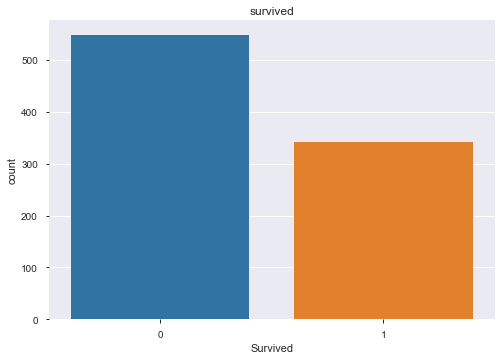

In [12]:
sns.countplot(x=titanic["Survived"]).set(title = 'survived')

[Text(0.5, 1.0, 'Distribution of  Age')]

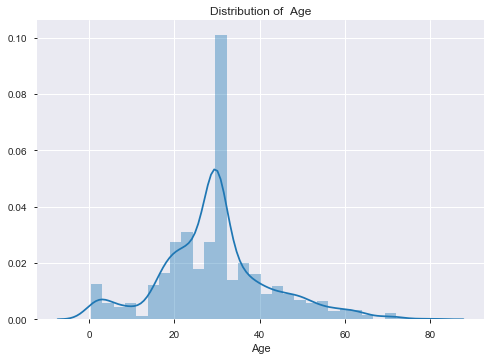

In [16]:
sns.distplot(X["Age"]).set(title = "Distribution of  Age")

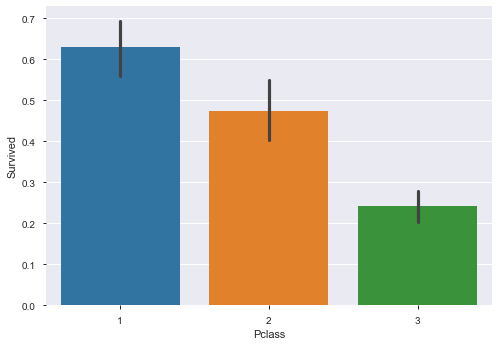

In [17]:
sns.barplot(x=titanic["Pclass"],y=titanic["Survived"])

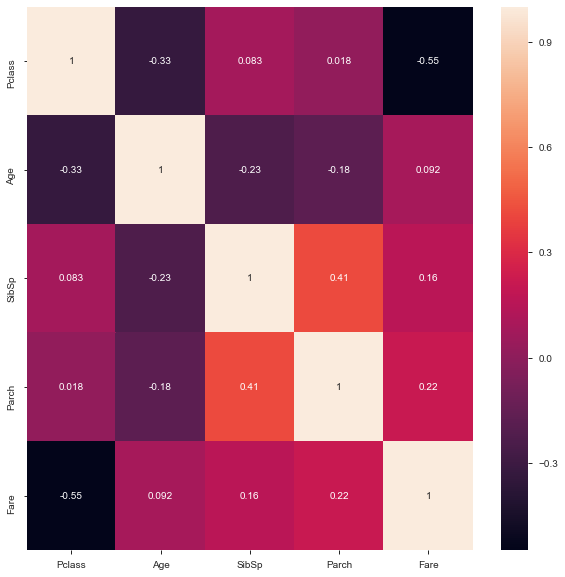

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True)

In [24]:
X['Sex'] = pd.get_dummies(X['Sex']).values

E:\Anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


### 3. Model Building

In [26]:
# Spliting dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
# importing classifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
print(f'Shape of train feature:{X_train.shape}')
print(f'Shape of test feature :{X_test.shape}')
print(f'Shape of train target :{y_train.shape}')
print(f'Shape of test target  :{y_test.shape}')

Shape of train feature:(623, 6)
Shape of test feature :(268, 6)
Shape of train target :(623,)
Shape of test target  :(268,)


In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from collections import Counter


import scikitplot.metrics as skplt

In [30]:
# Instantiating Decision tree model
model_dt = DecisionTreeClassifier()
# Fitting on train data
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
# Predicting on test dataset
y_pred = model_dt.predict(X_test)

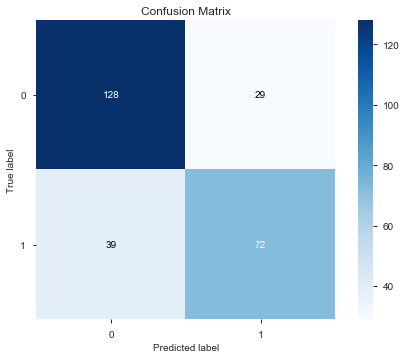

In [33]:
# Plotting the confusion matrix
skplt.plot_confusion_matrix(y_test ,y_pred)

In [34]:
accuracy_score(y_test,y_pred)

0.746268656716418